# Building a Model for Probability of Default

---

## Problem Statement
Bank A has past records of its Bank Loan Customers who have either Fully Paid Off or Defaulted on their Loans. The Bank wants build wants to build a model that will predict if a future Loan customer would Default.

## Approach
Since the Dependant Variable (Loan Status) is Binary,i.e., either Default or Non-Default, it is a clear case of Logistic Regression.
* Defaulter = 1
* Non-Defaulter = 0

## Steps
* <a href="#import">Import Data and Libraries</a>
* <a href="#data_desc">Data Description</a>
* <a href="#data_cleaning">Data Cleaning and Encoding</a>
    * Null Value Treatment
    * Rename Columns
    * Replace Values
    * Encode Category columns to Numeric
* <a href="#selection">Variable Selection</a> 
    * Data Visualization
    * Machine Learning Algorithm
* <a href="#splitting">Split the Data into Training and Testing Data</a>
* <a href="#build">Build the Model</a>
* <a href="#ensemble">Apply Ensemble Methods to Improve Model Accuracy</a>
* <a href="#measure">Performance Measurement</a>
* <a href="#compare">Actuals vs Predicted</a>
* <a href="#summary">Model Summary</a>
---

<a id=’import’></a>
## Import Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Displays Float Values with 2 Decimal Places 
pd.options.display.float_format = "{:,.2f}".format

#### Import the Dataset

In [24]:
data = pd.read_csv('https://github.com/penroselearning/curriculum/raw/master/professional/bank_loan_data.csv')

---
<a id=’data_desc’></a>
## Data Description

#### Data Dimension - Total Rows and Columns

In [25]:
data.shape

(24642, 19)

#### Data Information - String, Numerical, Date and Categorical Variables

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24642 entries, 0 to 24641
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       24642 non-null  object 
 1   Customer ID                   24642 non-null  object 
 2   Loan Status                   24642 non-null  object 
 3   Current Loan Amount           24642 non-null  int64  
 4   Term                          24642 non-null  object 
 5   Credit Score                  24592 non-null  float64
 6   Annual Income                 24642 non-null  int64  
 7   Years in current job          24553 non-null  object 
 8   Home Ownership                24642 non-null  object 
 9   Purpose                       24642 non-null  object 
 10  Monthly Debt                  24642 non-null  float64
 11  Years of Credit History       24642 non-null  float64
 12  Months since last delinquent  24642 non-null  int64  
 13  N

#### View the Top and Bottom Rows

In [27]:
data.head()

Loan ID                           Customer ID  \
0  98f1645b-5913-4711-80be-b23b5b67f0d5  137a0896-09bf-4aef-ae06-312e5d9392c7   
1  afd17b85-ecf1-4f8f-80da-677d94c4fbb8  708a6d74-ec6f-4d38-bf7d-441d637adcf1   
2  df703d2e-dc45-4aaf-a838-52817d0095ff  bc141c8a-74a0-4e31-8dc8-88cc3e93633e   
3  2fcbf874-9ed3-47a0-964b-74b0c5a75ad0  f318b22d-87df-40ba-aa2c-1eb2d7078e98   
4  a0c67880-b55a-44a0-842c-c2a7ba974c3b  0d365a60-03dc-4faa-b9be-b6161a2f6cee   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Charged Off               257796  Short Term        370.00         680561   
1   Fully Paid               224730  Short Term        696.00        1271252   
2  Charged Off               269324  Short Term        387.00        2810651   
3   Fully Paid               421432  Short Term        697.00         812041   
4   Fully Paid               331628  Short Term        692.00         972268   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0             < 1 year           Rent  Debt Consolidation     10,095.08   
1             < 1 year           Rent               Other     35,701.19   
2               1 year  Home Mortgage  Debt Consolidation     53,402.35   
3            10+ years  Home Mortgage  Debt Consolidation     16,782.32   
4            10+ years  Home Mortgage  Debt Consolidation     19,850.63   

   Years of Credit History  Months since last delinquent  \
0                    14.50                             0   
1                    19.50                             0   
2                    28.30                             0   
3                    38.30                             0   
4                    25.80                             0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        9                          0                  293835   
1                        9                          0                    5320   
2                        9                          0                  557764   
3                       14                          0                  243523   
4                       17                          0                   50939   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0           591,690.00          0.00       0.00  
1           384,846.00          0.00       0.00  
2           910,910.00          0.00       0.00  
3           375,958.00          0.00       0.00  
4           746,570.00          0.00       0.00

---
### Data Description

In [28]:
data.describe()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count            24,642.00     24,592.00      24,642.00     24,642.00   
mean            310,039.95        619.96   1,392,133.98     18,892.76   
std             181,569.32        150.29     676,595.84     11,237.98   
min              21,450.00        300.00     111,245.00          0.00   
25%             173,651.50        467.00     923,670.75     11,081.70   
50%             267,674.00        708.00   1,246,979.50     17,007.38   
75%             429,852.50        732.00   1,712,137.50     24,444.97   
max             789,096.00        751.00   4,634,575.00    119,621.72   

       Years of Credit History  Months since last delinquent  \
count                24,642.00                     24,642.00   
mean                     19.01                         34.59   
std                       6.64                         21.59   
min                       3.80                          0.00   
25%                      14.50                         16.00   
50%                      17.70                         31.00   
75%                      22.40                         51.00   
max                      70.50                         81.00   

       Number of Open Accounts  Number of Credit Problems  \
count                24,642.00                  24,642.00   
mean                     11.49                       0.18   
std                       4.95                       0.52   
min                       1.00                       0.00   
25%                       8.00                       0.00   
50%                      11.00                       0.00   
75%                      14.00                       0.00   
max                      48.00                      15.00   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
count               24,642.00            24,641.00     24,607.00  24,633.00  
mean               256,672.71           667,305.38          0.11       0.04  
std                287,121.52         6,634,997.80          0.35       0.30  
min                      0.00                 0.00          0.00       0.00  
25%                101,194.00           248,094.00          0.00       0.00  
50%                186,076.50           419,870.00          0.00       0.00  
75%                323,750.50           698,456.00          0.00       0.00  
max              6,723,017.00       798,255,370.00          4.00      15.00

#### View List of Unique Values in Object Variables

In [29]:
data["Years in current job"].unique()

array(['< 1 year', '1 year', '10+ years', nan, '2 years', '3 years',
       '4 years', '5 years', '7 years', '8 years', '9 years', '6 years'],
      dtype=object)

In [30]:
data["Home Ownership"].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

<AxesSubplot:>

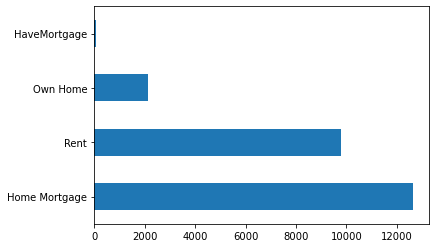

In [31]:
data["Home Ownership"].value_counts().plot(kind="barh")

In [32]:
data["Purpose"].unique()

array(['Debt Consolidation', 'Other', 'Home Improvements',
       'Medical Bills', 'Business Loan', 'moving', 'Buy a Car',
       'Buy House', 'vacation', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

#### Find Null Values - Count

In [33]:
data.isnull().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                    50
Annual Income                    0
Years in current job            89
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Months since last delinquent     0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              1
Bankruptcies                    35
Tax Liens                        9
dtype: int64

#### Observations
* Columns with Null Values (**Credit Score, Maximum Open Credit, Bankruptcies, Tax Liens**) need to be treated.
* **Years in Current Job**, **Home Ownership**, **Term** and **Purpose** can be encoded as numeric variables

---
<h2 id="data_cleaning">Data Cleaning</h2>

#### Remove Unwanted Columns

Removes Loan ID and Customer ID Columns

In [34]:
data = data.iloc[:,2:]

#### Replace Null Values

##### Replace Categorical Variables with Mode

In [35]:
data["Years in current job"].fillna(data["Years in current job"].mode()[0],inplace = True)

##### Replace Numerical Values with the Median

In [36]:
cols = list(data.select_dtypes(include=['int64','float64']).columns)

for col in cols:
    data[col].fillna(data[col].median(),inplace = True)

#### Add a Numerical Column Based on Dependent Variable

In [37]:
data.insert(0,"Defaulter",np.where(data['Loan Status'] == "Fully Paid", 0,1))

---
### Data Visualization

<AxesSubplot:ylabel='Term'>

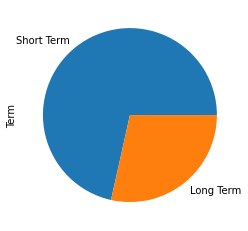

In [38]:
data["Term"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Home Ownership'>

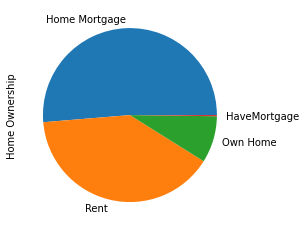

In [39]:
data["Home Ownership"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Frequency'>

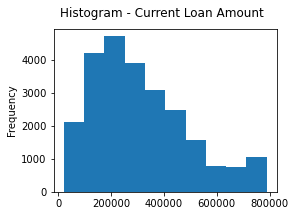

In [40]:
plt.figure(figsize=(4,3))
plt.suptitle("Histogram - Current Loan Amount")
data["Current Loan Amount"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

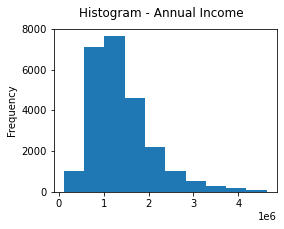

In [41]:
plt.figure(figsize=(4,3))
plt.suptitle("Histogram - Annual Income")
data["Annual Income"].plot(kind="hist")

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

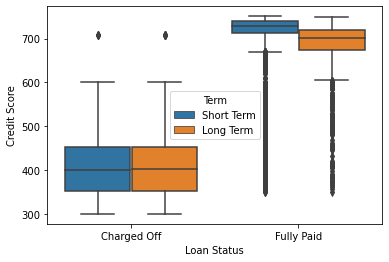

In [42]:
sns.boxplot(data=data,x="Loan Status",y="Credit Score",\
            hue="Term")

---
### Data Encoding and Replacing Values

##### Extract numerical value from years of service

In [43]:
import re
def extract_number(years):
    search_term = '[0-9]'
    years_in_current_job = re.findall(search_term,years)
    return int("".join(years_in_current_job))
    

In [44]:
data['Years in current job'] = data.apply(lambda x:extract_number(x['Years in current job']),axis=1)

##### Replace Term with Numeric values

In [45]:
data['Term'].replace({'Short Term':1,'Long Term':2},inplace = True)

##### Data Correction - Replace Incorrect values

In [46]:
data['Home Ownership'].replace({'HaveMortgage':'Home Mortgage'},inplace = True)

##### One-Hot Encoding

In [47]:
cols = ['Home Ownership',
       'Purpose']

for col in cols:
    new_df = pd.get_dummies(data[col], prefix=col)
    
    data = pd.concat([data,new_df],axis=1)
    data.drop(col,axis=1,inplace=True)

---
### Identify and Remove Outliers

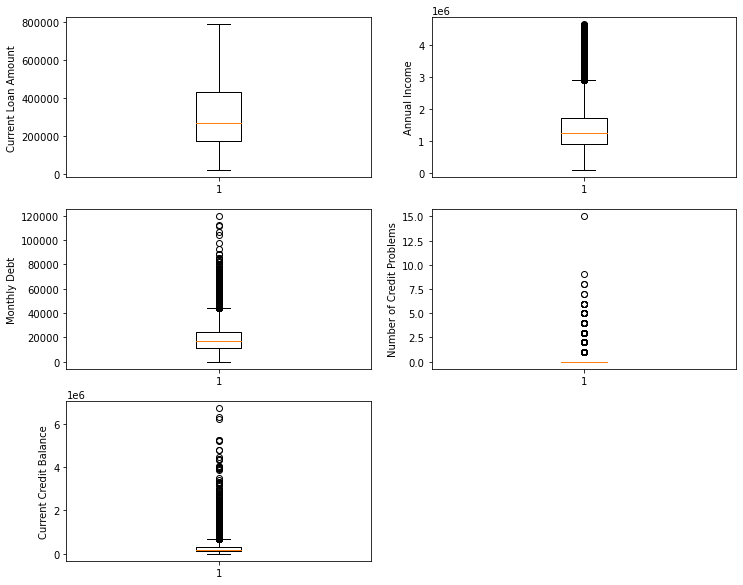

In [48]:
cols = ['Current Loan Amount','Annual Income','Monthly Debt',
        'Number of Credit Problems','Current Credit Balance']

plt.figure(figsize=(12,10))
for sno,col in enumerate(cols,321):
    ax = plt.subplot(sno)
    ax.boxplot(data[col])
    ax.set_ylabel(col)

#### Remove Outliers using Z-Score

Create a New DataFrame containing z-scores of all the listed numeric columns

In [49]:
cols = list(data.select_dtypes(include=['int64','float64']))

data_zscore = np.abs(data[cols].apply(stats.zscore))

From the create dataframe, extract a List of Index numbers with ZScore > 3</br>
Thresh of 1 means, keep those records with a minimum of 1 column containing of value of 3

In [50]:
outliers = list(data_zscore[abs(data_zscore > 3)].dropna(thresh=1).index)

Drop Rows based on Index Numbers

In [51]:
data.drop(outliers,inplace=True)

---
<a id=’selection’></a>
## Variable Selection


### Heatmap 
#### Shows Correlation between Variables

In [52]:
data[["Defaulter","Credit Score"]].corr()

Defaulter  Credit Score
Defaulter          1.00         -0.94
Credit Score      -0.94          1.00

<AxesSubplot:>

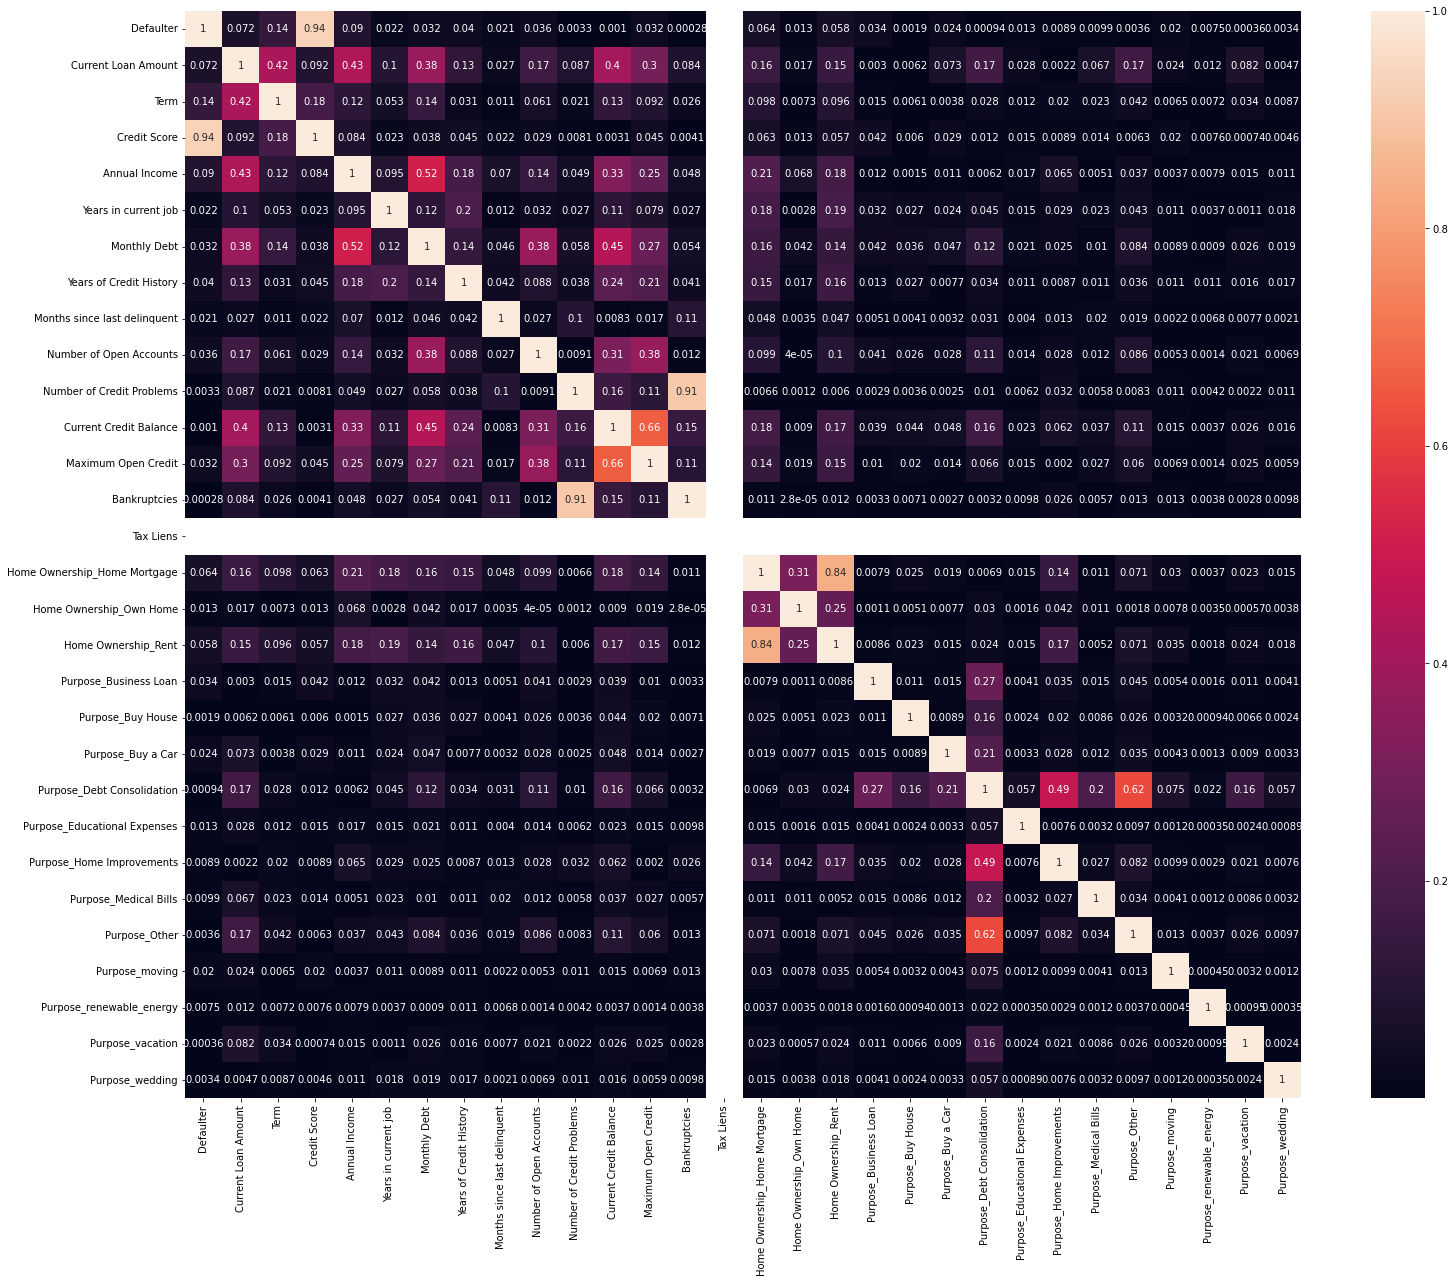

In [53]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr().abs(),xticklabels=data.corr().abs().columns, yticklabels=data.corr().abs().columns, annot=True)

#### Identify Dependent and Independent Variables

Use a Machine Learning Algorithm to Select the most suited Variables 
(RFECV - Recrusive Feature Elimination with cross-validated selection of the best number of features)

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

cols = list(data.select_dtypes(include=['uint8','int64','float64']).columns)

X = data[cols[1:]]


y = data[['Defaulter']]

model = LogisticRegression(solver='lbfgs')
rfe = RFECV(model, min_features_to_select=3)
fit = rfe.fit(X, y)
print(f"Recommended Number of Features: {fit.n_features_}")
print(f"Feature Ranking: {fit.ranking_}")

Recommended Number of Features: 6
Feature Ranking: [ 5  1  1  6  2  4  1  3  1 10  8  7  9 24  1 12 16 11 23 13  1 18 19 15
 14 17 21 20 22]


In [55]:
ranking = pd.Series(fit.ranking_)

ranked_cols= list(ranking.where(ranking==1).dropna().index)
selected_cols = list(X.iloc[:,ranked_cols].columns)

print("Selected Columns using RFECV")
print("-" * 30)
for c in selected_cols:
    print(c)

Selected Columns using RFECV
------------------------------
Term
Credit Score
Years of Credit History
Number of Open Accounts
Home Ownership_Home Mortgage
Purpose_Debt Consolidation


---
<a id=’splitting’></a>
## Splitting Data

### Testing and Training Data

Choose the the Top 3 Ranked Variables in the Independent Variable Split

In [56]:
X = data[selected_cols]

y = data[['Defaulter']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=100)

---
<a id=’build’></a>
## Build the Model
#### Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

model.fit(X_train,y_train)

LogisticRegression()

#### Apply the Model on the Test Data

In [58]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0])

#### Check the Model Accuracy

Check for Overfitting and Underfitting

##### Accuracy on Test Data

In [59]:
f'{round(model.score(X_test,y_test) * 100,2)}%'

'98.16%'

##### Accuracy on Training Data

In [60]:
f'{round(model.score(X_train,y_train) * 100,2)}%'

'98.25%'

---
<a id=’ensemble’></a>
## Applying Decision Tree and Ensemble Methods

#### Import Libraries for Ensemble Methods

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

#### Decision Tree Model
Decision Tree is built on the entire Dataset

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9706932460577209

#### Random Forest Model - Bagging
Compared to Decision Tree Model, accuracy can go up by 5%<br/>
Parameter - n_estimators stands for how many tree we want to grow<br/>
The final score is based on Vote

Overfitting. Random Forests does not overfit. The testing performance of Random Forests does not decrease (due to overfitting) as the number of trees increases. Hence after certain number of trees the performance tend to stay in a certain value.

In [63]:
rf = RandomForestClassifier(n_estimators=1000, max_features="auto",random_state=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9815531091936923

#### AdaBoost Model - Boosting
Compared to Decision Tree Model, accuracy can go up by 10%<br/>
Same dataset is used with updated weight<br/>
The weighted error rate (e) is just how many wrong predictions out of total and you treat the wrong predictions differently based on its data point’s weight. The higher the weight, the more the corresponding error will be weighted during the calculation of the (e).

In [64]:
ab = AdaBoostClassifier(n_estimators=1000, random_state=100)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
accuracy_score(y_test, y_pred_ab)

0.9822969354358821

#### Gradient Boosting Model - Boosting
Compared to Decision Tree Model, accuracy can go up by 10%<br/>
Calculates Residuals of the Decision Tree and used that for Prediction in the Next Trees<br/>
Residual equals the Distance between each Observation and Prediction. Residuals cannot be explained by Regression Line

In [65]:
gb = GradientBoostingClassifier(n_estimators=1000,random_state=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.9796191609639988

---
<a id=’measure’></a>
## Performance Measurement

#### Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[4639  101]
 [  23 1959]]


#### Interpreting the Results of a Confusion Matrix

* True Negative (Top Left) - We predicted as **non-defaulters** and it was **non-defaulters**
* False Positive (Top Right) - We predicted as **defaulters** but it was **non-defaulters**
* False Negative (Bottom Left) - We predicted as **non-defaulters** but it was **defaulters**
* True Positive (Bottom Right) - We predicted as **defaulters** and it was **defaulters**

#### Credit Classification Report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4740
           1       0.95      0.99      0.97      1982

    accuracy                           0.98      6722
   macro avg       0.97      0.98      0.98      6722
weighted avg       0.98      0.98      0.98      6722



---
### Performance Measurement for Decision Trees and Ensemble Methods

#### Decision Tree

In [68]:
tn_fp,fn_tp = confusion_matrix(y_test, y_pred_dt)
classification_report(y_test, y_pred_dt)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 4,649
False Positive: 91
False Negative: 106
True Positive: 1,876


#### Random Forest

In [69]:
tn_fp,fn_tp = confusion_matrix(y_test, y_pred_rf)
classification_report(y_test, y_pred_rf)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 4,641
False Positive: 99
False Negative: 25
True Positive: 1,957


#### Ada Boost

In [70]:
tn_fp,fn_tp = confusion_matrix(y_test, y_pred_ab)
classification_report(y_test, y_pred_ab)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 4,643
False Positive: 97
False Negative: 22
True Positive: 1,960


#### Gradient Boosting

In [71]:
tn_fp,fn_tp = confusion_matrix(y_test, y_pred_gb)
classification_report(y_test, y_pred_gb)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 4,642
False Positive: 98
False Negative: 39
True Positive: 1,943


---
<a id=’compare’></a>
## Actuals vs Predicted

##### Chosen AdaBoost as the most suited method for the model due to higher recall rate
Recall = (TP / TP + FN)

In [72]:
pred = y_test.copy()
pred.insert(1,"Prediction",y_pred_ab)

In [73]:
pred.rename(columns={"Defaulter":"Actual"},inplace=True)

In [74]:
pred.to_csv("predictions.csv")

#### Locate the False Postives and the False Negatives

In [75]:
fn = list(pred[(pred["Actual"]==1) & (pred["Prediction"]==0)].index)
fp = list(pred[(pred["Actual"]==0) & (pred["Prediction"]==1)].index)

#### False Negatives

In [76]:
data[data.index.isin(fn)].to_csv("fn.csv")

#### False Positives

In [77]:
data[data.index.isin(fp)].to_csv("fp.csv")

#### Test the Model with Sample Data

In [78]:
"Non-Defaulter" if ab.predict([[0,550,3,2,1,1,1]])[0] == 0 else "Defaulter"

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 6 features as input.

### Build a Flat File of the Model

The serialised binary pickle of the model can be used to apply predictions on New Datasets

In [ ]:
tlist = list(X_train.columns)

In [ ]:
import pickle

In [ ]:
with open('ml_model.pkl','wb') as file:
    pickle.dump(ab,file)
    pickle.dump(list(X_train),file)

In [ ]:

with open('ml_model.pkl','rb') as file:
    pkl = pickle.load(file)
    new = pickle.load(file)

In [ ]:
new

---
<a id=’summary’></a>
## Model Summary

* Out of all Rows in the Test Dataframe, the Model has an accuracy of 98%. This means that 98% of all predictions are correct.

* Recall (aka Sensitivity / True Positive Rate) of .99 means that all from Actual Defaulters, the model detected 99% defaulters.

* For the given data, this is a good model to predict both defaulters and non-defaulters